In [1]:
dataset = "data/Coco"
version = "2017"

In [2]:
import torch
import torch.utils.data as data
from python.data.dataset import *
from python.models.generator import UNet
from python.models.discriminator import PatchGAN
from python.utils.images import *
from python.train.trainer import *
from tqdm.notebook import tqdm
from python.eval.evaluation import Evalutation

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = UNet(1, 2)
generator.load_state_dict(torch.load("saved_models/30_G_R1", map_location=device))

<All keys matched successfully>

In [3]:
dataset_val= CocoLab(dataset, split="val", version=version, size=256)
val_loader = data.DataLoader(dataset_val, batch_size=5, shuffle=True, num_workers=2)

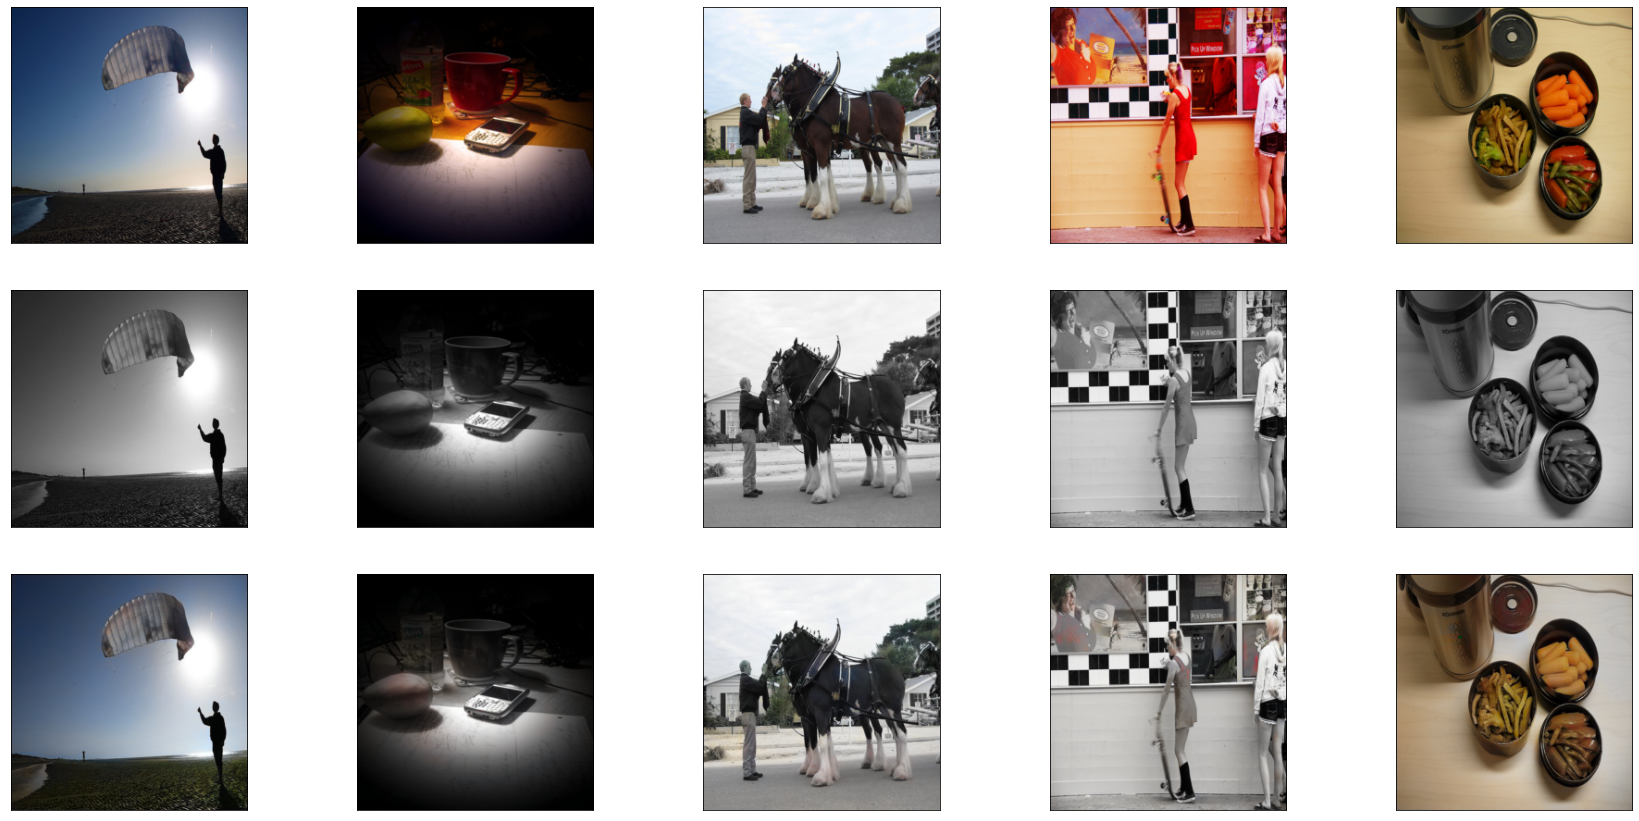

In [4]:
multi_plot(val_loader, generator, columns=5)

In [15]:
L, real_ab = next(iter(val_loader))

In [16]:
fake_ab = generator(L.to(device)).detach().to("cpu")

In [17]:
evaluation = Evalutation()
evaluation.eval(L, real_ab, fake_ab)

==== Evaluation ====
  ssim: 0.9301
--------------------
  psnr: 24.1817
--------------------
